<a href="https://colab.research.google.com/github/ppunkz/CE888_DS/blob/master/Assignment2/Medical%20Cost%20Personal%20Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('insurance.csv')

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
## Label encoding
number = LabelEncoder()
for i in df.columns:
    if (df[i].dtype == 'object'):
      df[i] = number.fit_transform(df[i].astype('str'))
      df[i] = df[i].astype('object')

In [0]:
sp = np.random.rand(len(df)) < 0.7
train = df[sp]
test = df[~sp]

In [0]:
# Creating a new feature origin
train['origin'] = 0
test['origin'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train.drop('charges',axis=1)

,age,sex,bmi,children,smoker,region,origin
0,19,0,27.900,0,1,3,0
2,28,1,33.000,3,0,2,0
3,33,1,22.705,0,0,1,0
4,32,1,28.880,0,0,1,0
5,31,0,25.740,0,0,2,0
...,...,...,...,...,...,...,...
1331,23,0,33.400,0,0,3,0
1332,52,0,44.700,3,0,3,0
1334,18,0,31.920,0,0,0,0
1335,18,0,36.850,0,0,2,0


In [0]:
## Combining random samples
combine = train.append(test)
y = combine['origin']
combine.drop('origin',axis=1,inplace=True)

In [0]:
## Modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combine.columns:
    score = cross_val_score(model,pd.DataFrame(combine[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

In [0]:
X = df.drop('charges',axis=1)
y = df['charges']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=42)

In [0]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
predict = rf.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predict))

In [0]:
#RMSE with normal dataset
print(rms)

4595.383345719498


In [0]:
#reorder age column into ascending
new_df = df.sort_values(by=['age'])

In [0]:
X = new_df.drop('charges',axis=1)
y = new_df['charges']

In [0]:
#split train and test 70:30
train_pct_index = int(0.7 * len(new_df))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

Text(0.5, 1.0, 'Distribution of Age feature between train and test sets')

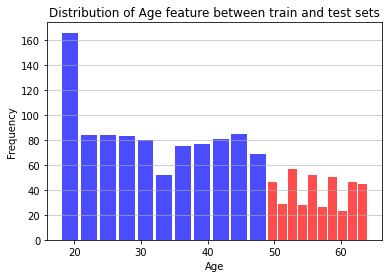

In [0]:
#plotting histrogram of age feature between train and test
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=X_train['age'], bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=X_test['age'], bins='auto', color='red',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age feature between train and test sets')

In [0]:
#fitting algorithm and predicting without applying dropping techniques with drifting in age feature
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)

In [0]:
rms = sqrt(mean_squared_error(y_test, y_predict))

In [0]:
#Result of RMSE without applying dropping techniques with drifting in age feature
print(rms)

5748.177277649479


In [0]:
#fitting algorithm by dropping drifting feature age
rf.fit(X_train.drop('age',axis=1),y_train)
y_predict = rf.predict(X_test.drop('age',axis=1))

In [0]:
#result of rmse by dropping feature age
rms = sqrt(mean_squared_error(y_test,y_predict))
print(rms)

9074.572604606477


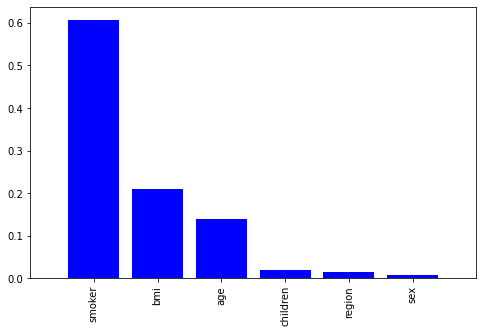

In [0]:
# plotting importances
import matplotlib.pyplot as plt
features = X_train.columns.values
imp = rf.feature_importances_
indices = np.argsort(imp)[::-1][:]
#plot
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), imp[indices], color = 'b', align='center')
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()